In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

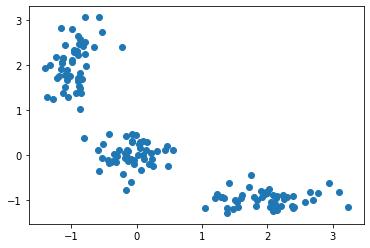

In [4]:
plt.scatter(X[:,0], X[:,1])

# Иерархическая кластеризация

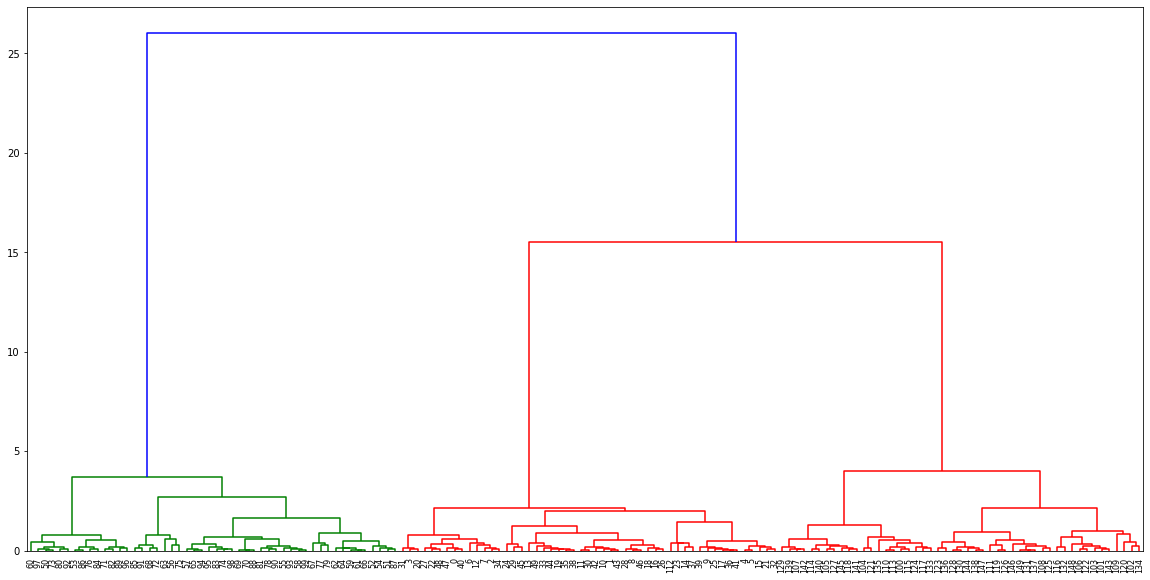

In [5]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'ward') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(Z, leaf_font_size=8., leaf_rotation=90.)

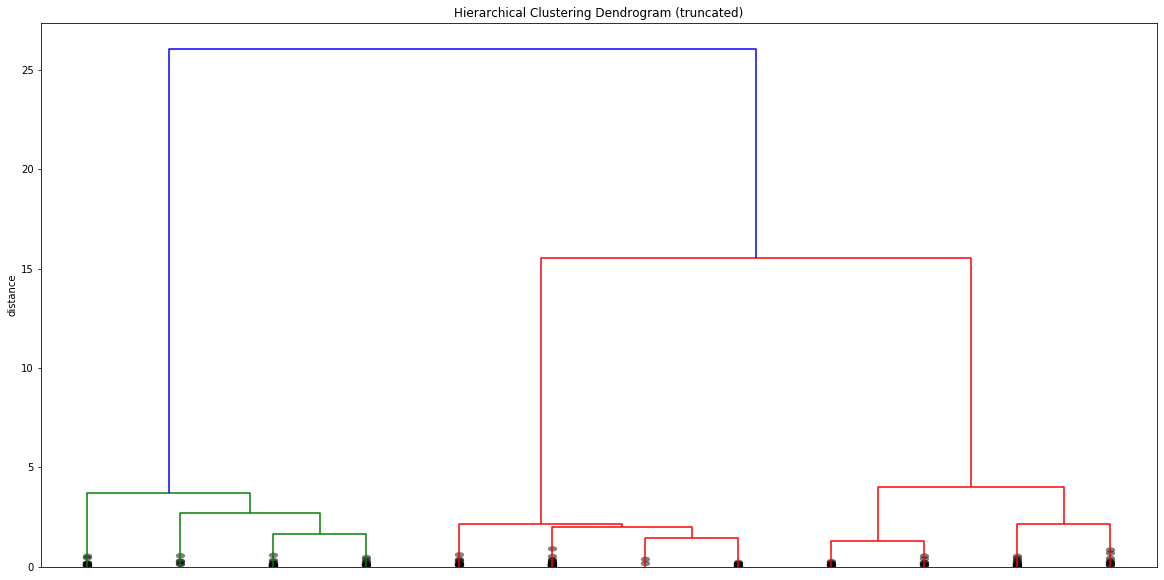

In [6]:
# на больших выборка на дендрограмму смотреть сложно, поэтому стоит ее обрезать
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
#plt.xlabel('sample index')
plt.ylabel('distance')
hierarchy.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

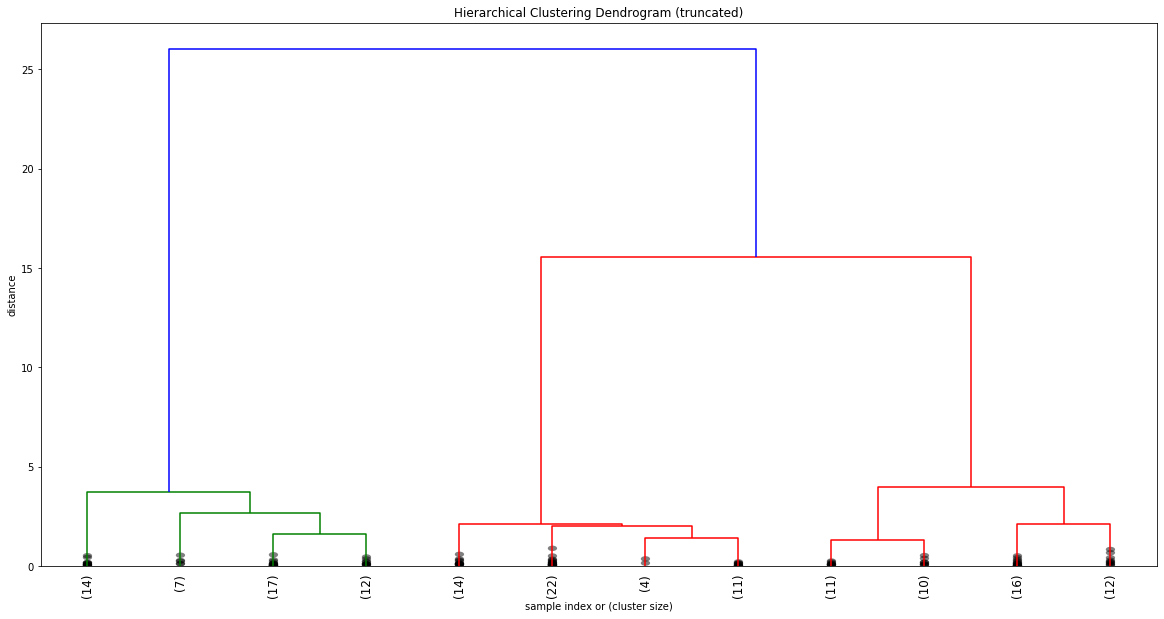

In [7]:
plt.figure(figsize=(20, 10))
# выводим размеры кластеров

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
hierarchy.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [8]:
# Зная расстояние матрица кластеров
from scipy.cluster.hierarchy import fcluster
max_d = 15
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

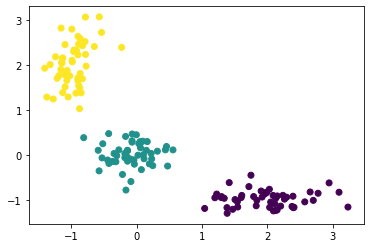

In [9]:
plt.scatter(X[:,0], X[:,1], c=clusters)

### Дендрограмма
http://www.mathworks.com/help/stats/dendrogram.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [10]:
# Зная k 
k=3
clusters2=fcluster(Z, k, criterion='maxclust')

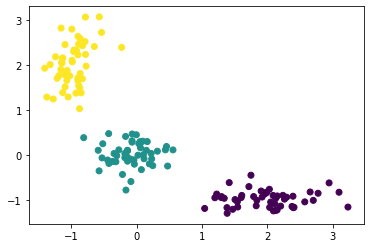

In [11]:
plt.scatter(X[:,0], X[:,1], c=clusters2)

# Density based clustering

## DBScan

[Визуализация алгоритма](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

* Кластеризация, основанная на плотности объектов
* Кластеры – участки высокой плотности, разделенные участками низкой
плотности
* жадный алгоритм

#### Определения

**Плотность**  
Количество объектов внутри сферы заданного радиуса $\varepsilon$

**Core-объект**  
Объект $\mathbf{x}$ является core-объектом, если плотность вокруг него больше $min\_pts$

**Граничный-объект**  
Объект $\mathbf{x}$ является граничным-объектом, если плотность вокруг него меньше $min\_pts$, но он находится внутри сферы заданного радиуса вместе с хотя бы одним core-объектом

**Шум**  
Объект $\mathbf{x}$ является шумом, если он не является ни core-объектом, ни граничным объектом

#### Параметры алгоритма
$min\_pts$, $\varepsilon$

![alt text](https://upload.wikimedia.org/wikipedia/commons/a/af/DBSCAN-Illustration.svg)

```
function dbscan(X, eps, min_pts):
	initialize NV = X # not visited objects
	for x in NV:
		remove(NV, x) # mark as visited
		nbr = neighbours(x, eps) # set of neighbours
		if nbr.size < min_pts:
			mark_as_noise(x)
		else:
			C = new_cluster()
			expand_cluster(x, nbr, C, eps, min_pts, NV)
			yield C
```


```


function expand_cluster(x, nbr, C, eps, min_pts, NV):
	add(x, C)
	for x1 in nbr:
		if x1 in NV: # object not visited
			remove(NV, x1) # mark as visited
			nbr1 = neighbours(x1, eps)
			if nbr1.size >= min_pts:
				# join sets of neighbours
				merge(nbr, nbr_1)
		if x1 not in any cluster:
			add(x1, C)
```

In [12]:
# Generate sample data
from sklearn.datasets.samples_generator import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [14]:
from sklearn.cluster import DBSCAN
#from sklearn import metrics


# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 18


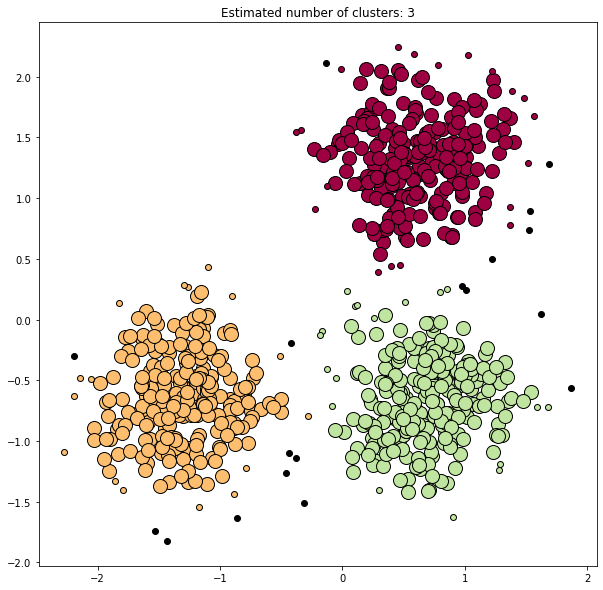

In [15]:
# Black removed and is used for noise instead.
plt.figure(figsize=(10, 10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [16]:
#Пример2 
# Generate sample data
from sklearn.datasets import make_circles
#enters = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)


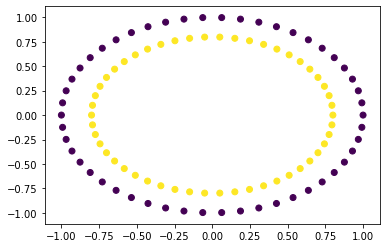

In [17]:
plt.scatter(X[:,0],X[:,1],c=labels_true)

In [18]:
X = StandardScaler().fit_transform(X)

In [19]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 0
Estimated number of noise points: 100


In [20]:
clustering = DBSCAN(eps=0.3, min_samples=3).fit(X)

In [21]:
clustering.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

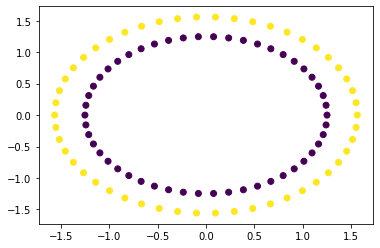

In [22]:
plt.scatter(X[:,0],X[:,1],c=clustering.labels_)

[Подбор параметров в DBScan](http://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)


**Сложность**: $O(n^2)$ или $O(n \log n)$ ($R^*Tree$) \\
**Память**: $O(n)$ или $O(n^2)$

* не требует $K$
* кластеры произвольной формы
* учитывает выбросы
* Не вполне детерминированный
* Не работает при разных плотностях кластеров (см. Optics)

## Optics clustering

http://www.dbs.ifi.lmu.de/Publikationen/Papers/OPTICS.pdf

# Практические замечания по кластеризации

In [24]:
# Generate data.
# `random_state` is the seed used by random number generator for reproducibility (default=None).
X, y = make_blobs(n_samples=5000,
                  n_features=2,
                  centers=3,
                  random_state=170)



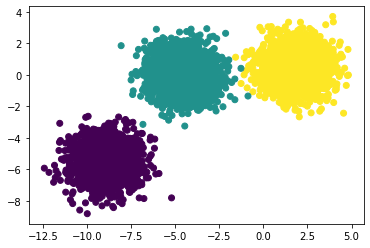

In [25]:
# Plot the data distribution (ground truth) using matplotlib `scatter(axis-x, axis-y, color)`.
plt.scatter(X[:,0], X[:,1], c=y)

In [27]:
from sklearn.cluster import KMeans

In [29]:
""" K-means clustering algorithm.

Parameters
----------
n_init: int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
        
init: {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++'.
        
        'k-means++': selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence.
        
        'random': generate k centroids from a Gaussian with mean and
        variance estimated from the data.

tol: float, default: 1e-4
        Relative tolerance with regards to inertia to declare convergence
        tolerance is computed using `np.mean(np.var(X, axis=0)) * tol)`

"""

# Perform K-means on our data (Train centroids)
kmeans = KMeans(n_clusters=3,
                n_init=3,
                init='random',
                tol=1e-4, 
                random_state=170).fit(X)
                #,
                #verbose=True).fit(X)

In [30]:
kmeans.labels_

array([0, 1, 1, ..., 0, 2, 2])

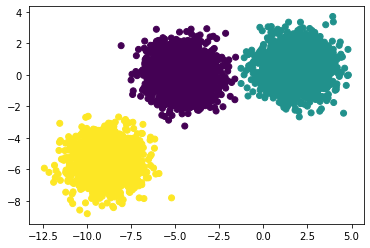

In [32]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

### Упражнение
Какие минусы в алгоритме k-means?

### Проблема 1
Чувствительность к инициализации центроидов

Поле `init`: k_means++

- случайно выбрать один центроид из точек.
- для каждой точки $x_i$, рассчитать расстояния $D(x_i, c_j)$ где $c_j$ ближайший $x_i$.
- случайно выбрать одну новую точку используя взвешенные вероятности пропорциональные $D(x_i, c_j)^2$.
- повторять шаги 2 и 3 пока центроиды не будут выбраны

In [33]:
# Perform K-means++ on our data.
kmeans_plus_plus = KMeans(n_clusters=3,
                n_init=3,
                init='k-means++',
                tol=1e-4, 
                random_state=170,
                verbose=True).fit(X)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9857.504888792919
start iteration
done sorting
end inner loop
Iteration 1, inertia 9733.250083803217
start iteration
done sorting
end inner loop
Iteration 2, inertia 9733.154277459327
center shift 8.017875e-06 within tolerance 1.463411e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 10071.97253110691
start iteration
done sorting
end inner loop
Iteration 1, inertia 9733.250083803217
start iteration
done sorting
end inner loop
Iteration 2, inertia 9733.154277459327
center shift 8.017875e-06 within tolerance 1.463411e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9733.154277459327
start iteration
done sorting
end inner loop
Iteration 1, inertia 9733.154277459327
center shift 0.000000e+00 within tolerance 1.463411e-03


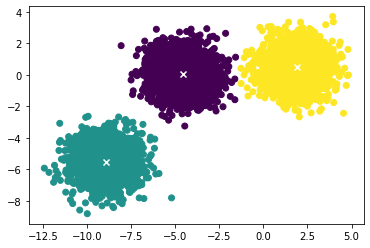

In [34]:
# Plot the predictions.
plt.scatter(X[:,0], X[:,1], c=kmeans_plus_plus.labels_)
plt.scatter(kmeans_plus_plus.cluster_centers_[:,0], 
            kmeans_plus_plus.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)

## Проблема 2: выбор числа кластеров (предыдущая лекция)

## Проблема 3: невозможно работать с зашумленными данными

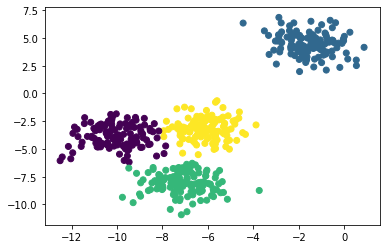

In [35]:
# Generate data.
# This particular setting has one distinct cluster and 3 clusters placed close together.
# (Same as the above example)
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Perform k-means with n_clusters=4
kmeans = KMeans(n_clusters=4, random_state=10)
y_pred = kmeans.fit_predict(X)

# Plot the prediction
plt.scatter(X[:,0], X[:,1], c=y_pred)

## Проблема 4: сферические данные

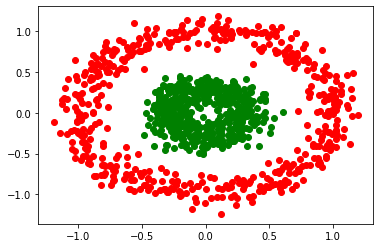

In [36]:
# Generate non-spherical data.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go')

In [38]:
from sklearn import metrics

Homogeneity: 0.00034956462860246355
Completeness: 0.0003498564223170973
Mean Silhouette score: 0.2936743345268271


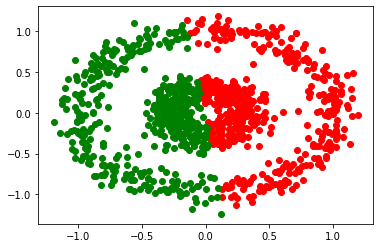

In [39]:
# Run k-means on non-spherical data.
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Plot the predictions.
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

# Print the evaluations
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

### Упражнение:
Как решить данную проблему?

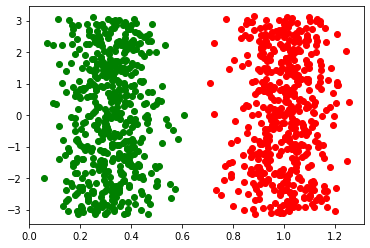

In [40]:
def cart2pol(x, y):
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return radius, theta

X_transformed = np.zeros_like(X)
X_transformed[:,0], X_transformed[:,1] = cart2pol(X[:,0], X[:,1])

plt.plot(X_transformed[y == 0, 0], X_transformed[y == 0, 1], 'ro')
plt.plot(X_transformed[y == 1, 0], X_transformed[y == 1, 1], 'go')

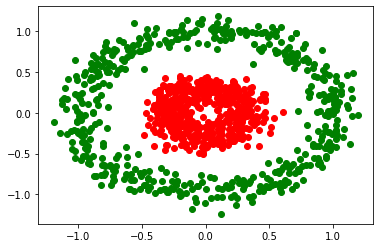

In [41]:
def cart2pol(x, y):
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return radius, theta

X_transformed = np.zeros_like(X)
# Convert cartesian (x-y) to polar coordinates.
X_transformed[:,0], _ = cart2pol(X[:,0], X[:,1])

# Only use `radius` feature to cluster.
y_pred = KMeans(n_clusters=2).fit_predict(X_transformed)

plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

## Проблема 5: категориальные признаки
mean не опредлено, попробуем использовать mode
https://github.com/nicodv/kmodes

# Дополнительные материалы
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
- https://en.wikipedia.org/wiki/Cophenetic_correlation
- http://www.dbs.ifi.lmu.de/Publikationen/Papers/OPTICS.pdf
- https://en.wikipedia.org/wiki/DBSCAN
- https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means
